In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

 - finding standard deviation of data 

In [5]:
X = pd.read_excel('./sdintuition.xls')
X.std()

Class I      1.568929
Class II     4.000000
Class III    2.631174
dtype: float64

 - Understanding **Drinking Habits and Integrity of College Students**
 - Procedure of analysis is usually as follows:
     - Understanding of problem statement
     - Understanding of how data was collected.
     - Answering few basic (ad-hoc) questions to get hold on data.
     - Start toward solving problem

In [6]:
df = pd.read_excel('./drinking.xls');
df.head(1)

,Gender,Alcohol,Height,Cheat
0,Female,15,64.0,0


 - Understanding problem statement
     - **Q1.** What are the drinking habits of students at this university? In particular, what is the typical number of drinks a student has during a week? Do the data suggest that drinking is a problem in this university?

     - **Q2.** One of the statistics professors at this university uses the honor system when giving exams. If there were cheating going on during her exams, would the professor be likely to know about it?
     
     
 - Understanding of how data was collected.
     - A student survey was conducted at a major university. Data were collected from a random sample of 236 undergraduate students, and the information that was collected included physical characteristics (such as height and handedness), study habits, academic performance and attitudes, and social behaviors. In this exercise we will focus on exploring relationships between some of those variables. 
  
  
 - Answering few basic questions
    - **Q1**: Out of the first ten students in the datafile, how many drink 15 or more alcoholic beverages per week?
    - **Q2**: Out of the first ten students in the datafile, how many alcoholic beverages per week does the tallest student drink?
    - **Q3**: What is the height of the first male in the datafile who would report on cheating?

In [47]:
# Q1
first_10_students = df.head(10)
first_10_students = first_10_students.replace('*', np.nan)
# first_10_students[first_10_students['Alcohol'] > 15]
ans_q1 = first_10_students[first_10_students['Alcohol'] >= 15].shape[0]
ans_q1

5

In [45]:
# Q2
tallest_student = first_10_students.sort_values(['Height'], ascending=False).iloc[0]
tallest_student['Alcohol']

15.0

In [52]:
# Q3
first_male_to_report_cheating = df[(df['Gender'] == 'Male') & (df['Cheat'] == 1)].head(1)
height_of_first_male_to_report_cheating = first_male_to_report_cheating['Height']
height_of_first_male_to_report_cheating

46    64.0
Name: Height, dtype: float64

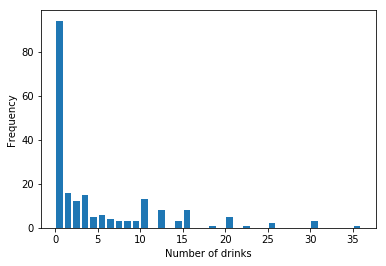

In [127]:
# What are the drinking habits of students at this university? 
# In particular, what is the typical number of drinks a student has during a week? 
# Do the data suggest that drinking is a problem in this university?
valid_observation = df['Alcohol'].replace('*', np.nan)
alcohol_without_missing = df[np.logical_not(np.isnan(valid_observation))]
plt.hist(list(alcohol_without_missing['Alcohol']), bins=np.max(alcohol_without_missing['Alcohol']), rwidth=0.8)
plt.xlabel('Number of drinks')
plt.ylabel('Frequency')
plt.show()

In [124]:
alcohol_without_missing['Alcohol'].astype(int).describe()

count    206.000000
mean       4.538835
std        6.915938
min        0.000000
25%        0.000000
50%        1.000000
75%        7.000000
max       36.000000
Name: Alcohol, dtype: float64

### Theory 1
 - What are the drinking habits of students at this university? 
    - Most of the students are light drinker. However, few are exception with abnormally high consumption. So, I consider the university student doesn't drink much.
 - In particular, what is the typical number of drinks a student has during a week? 
    - A typical student consumes 4.53 drinks per week.
 - Do the data suggest that drinking is a problem in this university?
    - It looks drinking is not a problem as majority of student drink less. Only few are exception which may cause problem.

### Theory 2
 - Most of the student drink 1 or less. But 25% student drink >7 drinks per week which is concern.

[216, 20]


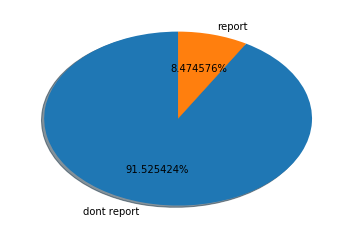

In [153]:
# One of the statistics professors at this university uses the honor system when giving exams. 
# If there were cheating going on during her exams, would the professor be likely to know about it?
report_cheat = df[df['Cheat'] == 1].shape[0]
dont_report = df.shape[0] - report_cheat
labels = ['dont report', 'report']
x = [dont_report, report_cheat]
print(x)
plt.pie(x, labels=labels, shadow=True, autopct='%3f%%', startangle=90)
plt.show()

 - Since most of the student opt "not to report cheating". So, introducing honor code may help in reducing the cheating instances.
 This might enable students to promote to report the cheating as well.